# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Willy Wilsen
- Email: willywilsen.ww@gmail.com
- Id Dicoding: willywilsen

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('data.csv', sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Menangani Missing Value

In [5]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### Menangani Numerikal ke Kategorikal

In [6]:
marital_status_map = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

if pd.api.types.is_numeric_dtype(df['Marital_status']):
    df['Marital_status'] = df['Marital_status'].map(marital_status_map)

application_mode_map = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

if pd.api.types.is_numeric_dtype(df['Application_mode']):
    df['Application_mode'] = df['Application_mode'].map(application_mode_map)

course_map = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

if pd.api.types.is_numeric_dtype(df['Course']):
    df['Course'] = df['Course'].map(course_map)

attendance_map = {
    1: 'daytime',
    0: 'evening'
}

if pd.api.types.is_numeric_dtype(df['Daytime_evening_attendance']):
    df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(attendance_map)

previous_qualification_map = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

if pd.api.types.is_numeric_dtype(df['Previous_qualification']):
    df['Previous_qualification'] = df['Previous_qualification'].map(previous_qualification_map)

nacionality_map = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

if pd.api.types.is_numeric_dtype(df['Nacionality']):
    df['Nacionality'] = df['Nacionality'].map(nacionality_map)

mothers_qualification_map = {
    1: "Secondary Education - 12th Year or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year - Not Completed",
    10: "11th Year - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year",
    14: "10th Year",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle",
    22: "Technical-professional Course",
    26: "7th Year of Schooling",
    27: "2nd Cycle of General High School",
    29: "9th Year - Not Completed",
    30: "8th Year",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read Without 4th Year",
    37: "Basic Education 1st Cycle",
    38: "Basic Education 2nd Cycle",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

if pd.api.types.is_numeric_dtype(df['Mothers_qualification']):
    df['Mothers_qualification'] = df['Mothers_qualification'].map(mothers_qualification_map)

fathers_qualification_map = {
    1: "Secondary Education - 12th Year or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year - Not Completed",
    10: "11th Year - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year",
    13: "2nd Year Complementary High School",
    14: "10th Year",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle",
    20: "Complementary High School Course",
    22: "Technical-professional Course",
    25: "Complementary High School Course - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle of General High School",
    29: "9th Year - Not Completed",
    30: "8th Year",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read Without 4th Year",
    37: "Basic Education 1st Cycle",
    38: "Basic Education 2nd Cycle",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

if pd.api.types.is_numeric_dtype(df['Fathers_qualification']):
    df['Fathers_qualification'] = df['Fathers_qualification'].map(fathers_qualification_map)

mothers_occupation_mapping = {
    0: "Student",
    1: "Legislative/Executive Representatives, Directors",
    2: "Intellectual and Scientific Specialists",
    3: "Intermediate Level Technicians",
    4: "Administrative Staff",
    5: "Personal Services, Security, Sellers",
    6: "Farmers, Agriculture, Fisheries",
    7: "Industry/Construction Craftsmen",
    8: "Machine Operators and Assemblers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "Blank",
    122: "Health Professionals",
    123: "Teachers",
    125: "ICT Specialists",
    131: "Intermediate Science & Engineering Technicians",
    132: "Intermediate Health Technicians",
    134: "Intermediate Legal, Social, Sports, Cultural Technicians",
    141: "Office Workers, Secretaries, Data Operators",
    143: "Accounting, Finance, Registry Operators",
    144: "Other Admin Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    171: "Skilled Construction Workers (except Electricians)",
    173: "Skilled Workers in Printing, Instruments, Jewelers, Artisans",
    175: "Workers in Food, Woodworking, Clothing & Other Industries",
    191: "Cleaning Workers",
    192: "Unskilled Agriculture, Animal Production, Fisheries",
    193: "Unskilled Extractive, Construction, Manufacturing, Transport",
    194: "Meal Preparation Assistants"
}

if pd.api.types.is_numeric_dtype(df['Mothers_occupation']):
    df['Mothers_occupation'] = df['Mothers_occupation'].map(mothers_occupation_mapping)

fathers_occupation_mapping = {
    0: "Student",
    1: "Legislative/Executive Representatives, Directors",
    2: "Intellectual and Scientific Specialists",
    3: "Intermediate Level Technicians",
    4: "Administrative Staff",
    5: "Personal Services, Security, Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries, Forestry",
    7: "Skilled Industry, Construction, Craftsmen",
    8: "Machine Operators and Assemblers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "Blank",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces Personnel",
    112: "Directors - Admin and Commercial Services",
    114: "Directors - Hotel, Catering, Trade, Other Services",
    121: "Specialists - Physical Sciences, Math, Engineering",
    122: "Health Professionals",
    123: "Teachers",
    124: "Finance, Accounting, Admin, Public/Commercial Relations Specialists",
    131: "Intermediate Science & Engineering Technicians",
    132: "Intermediate Health Technicians",
    134: "Intermediate Legal, Social, Sports, Cultural Technicians",
    135: "ICT Technicians",
    141: "Office Workers, Secretaries, Data Operators",
    143: "Accounting, Statistical, Financial, Registry Operators",
    144: "Other Admin Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    154: "Protection and Security Personnel",
    161: "Market-Oriented Farmers, Skilled Agriculture/Animal Production",
    163: "Subsistence Farmers, Fishermen, Hunters",
    171: "Skilled Construction Workers (except Electricians)",
    172: "Skilled Metal, Metallurgy Workers",
    174: "Skilled Electrical/Electronic Workers",
    175: "Workers in Food, Wood, Clothing, Crafts",
    181: "Fixed Plant and Machine Operators",
    182: "Assembly Workers",
    183: "Vehicle Drivers and Mobile Equipment Operators",
    192: "Unskilled Workers in Agriculture/Fisheries",
    193: "Unskilled Workers in Extractive, Construction, Manufacturing, Transport",
    194: "Meal Preparation Assistants",
    195: "Street Vendors (Non-food) and Street Services"
}

if pd.api.types.is_numeric_dtype(df['Fathers_occupation']):
    df['Fathers_occupation'] = df['Fathers_occupation'].map(fathers_occupation_mapping)

displaced_mapping = {
    1: "Yes",
    0: "No"
}

if pd.api.types.is_numeric_dtype(df['Displaced']):
    df['Displaced'] = df['Displaced'].map(displaced_mapping)

special_needs_mapping = {
    1: "Yes",
    0: "No"
}

if pd.api.types.is_numeric_dtype(df['Educational_special_needs']):
    df['Educational_special_needs'] = df['Educational_special_needs'].map(special_needs_mapping)

debtor_mapping = {
    1: "Yes",
    0: "No"
}

if pd.api.types.is_numeric_dtype(df['Debtor']):
    df['Debtor'] = df['Debtor'].map(debtor_mapping)

tuition_fees_mapping = {
    1: "Yes",
    0: "No"
}

if pd.api.types.is_numeric_dtype(df['Tuition_fees_up_to_date']):
    df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(tuition_fees_mapping)

gender_mapping = {
    1: "Male",
    0: "Female"
}

if pd.api.types.is_numeric_dtype(df['Gender']):
    df['Gender'] = df['Gender'].map(gender_mapping)

scholarship_mapping = {
    1: "Yes",
    0: "No"
}

if pd.api.types.is_numeric_dtype(df['Scholarship_holder']):
    df['Scholarship_holder'] = df['Scholarship_holder'].map(scholarship_mapping)

international_mapping = {
    1: "Yes",
    0: "No"
}

if pd.api.types.is_numeric_dtype(df['International']):
    df['International'] = df['International'].map(international_mapping)
    
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

### Univariate Analysis

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

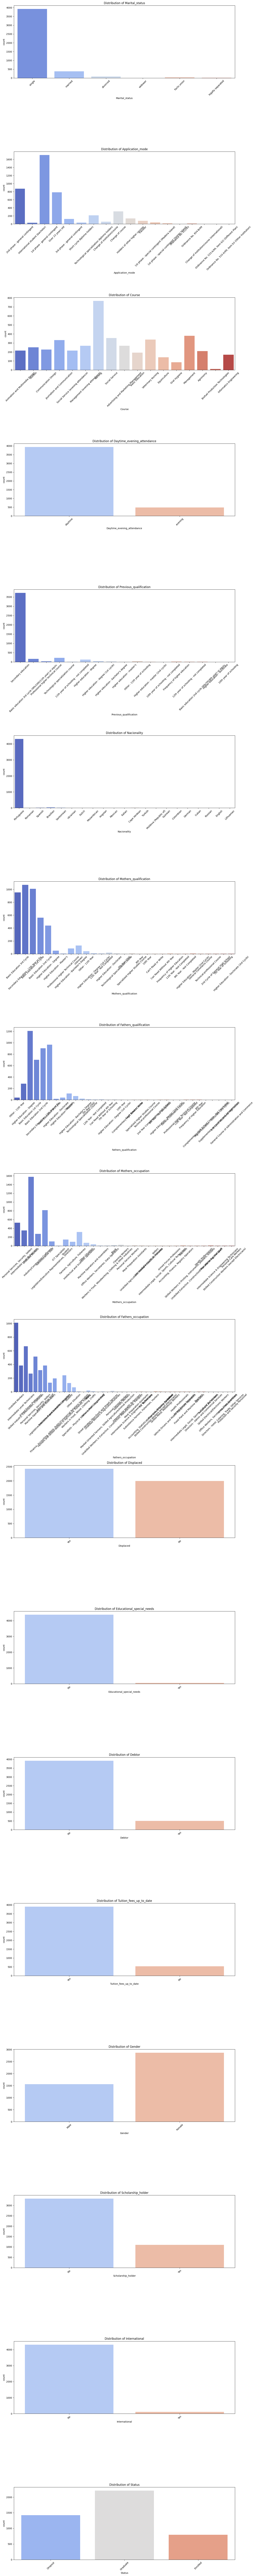

In [8]:
plt.figure(figsize=(15, 150))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(18, 1, i)
    sns.countplot(x=df[col], hue=col, data=df, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

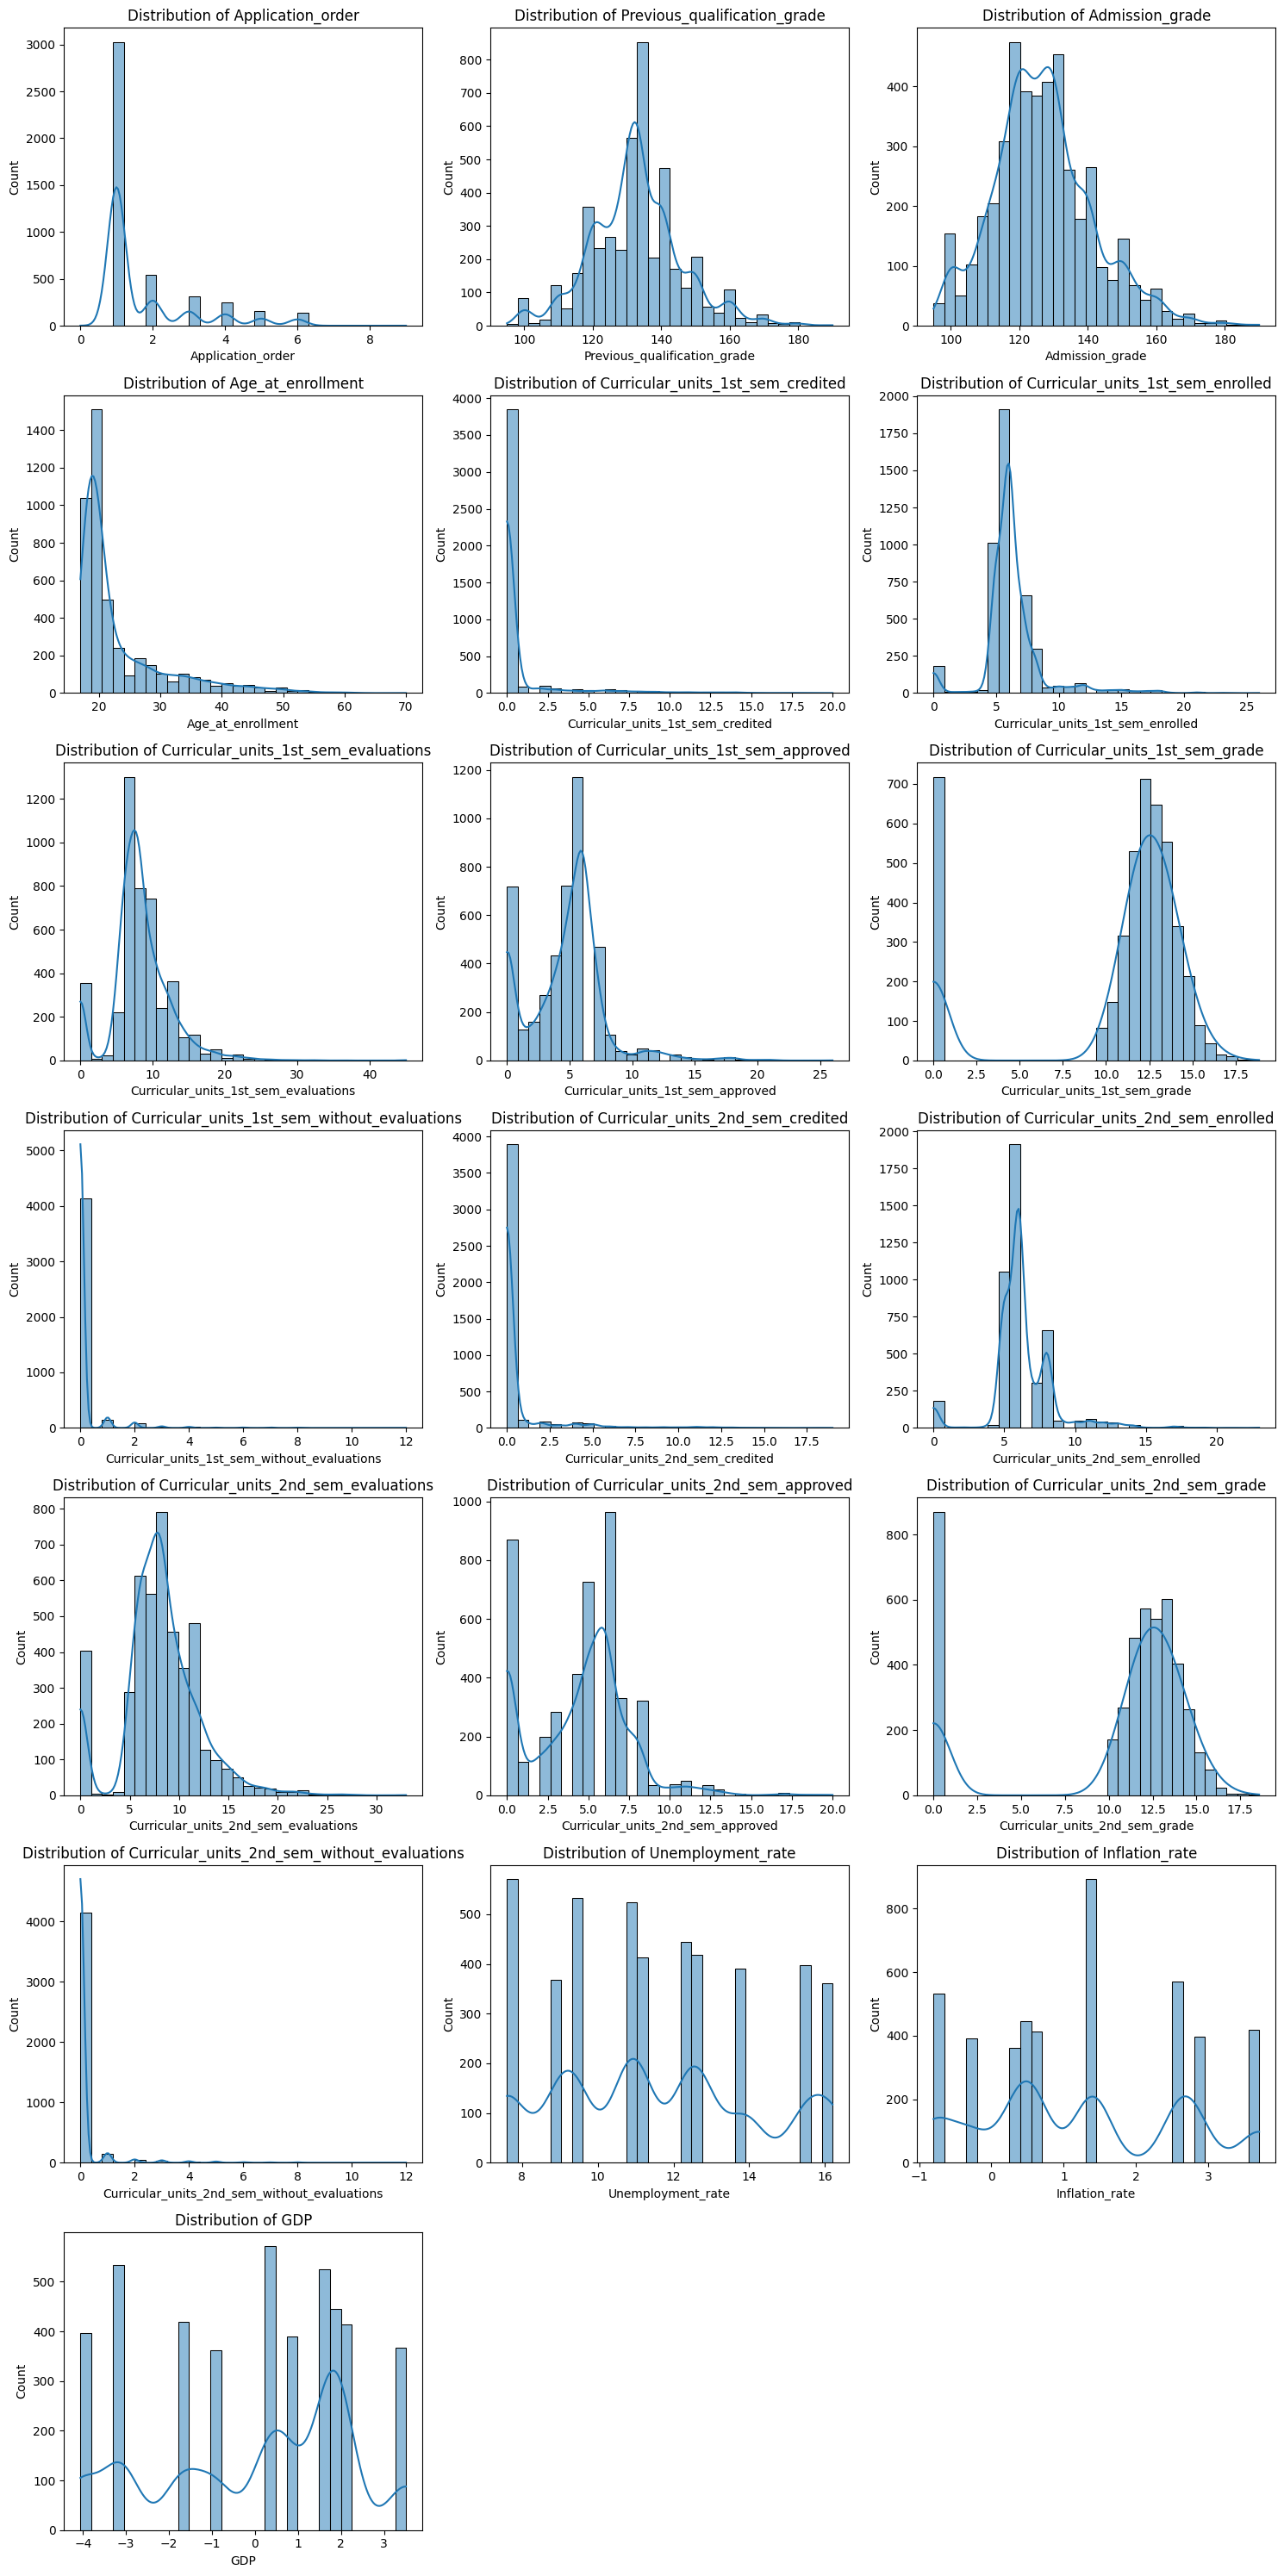

In [9]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

### Multivariate Analysis

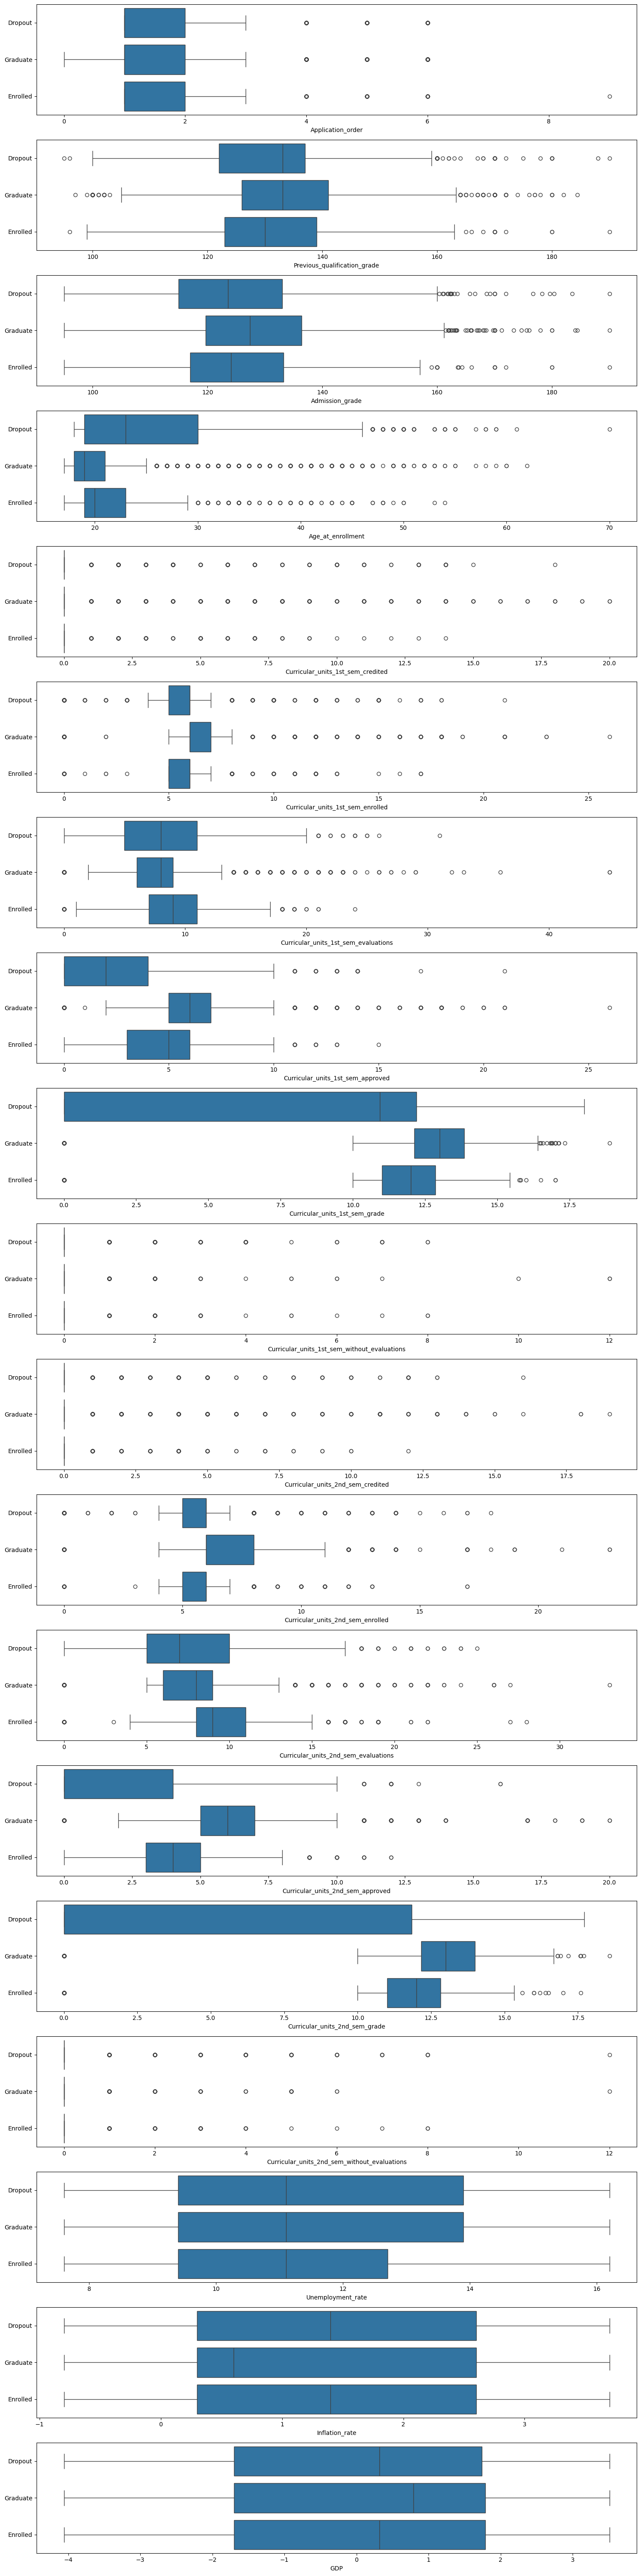

In [10]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,60))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()
 
numerical_dis_plot(
    features=numerical_cols,
    df=df,
    segment_feature='Status',
)

C:\Users\willy\AppData\Local\Temp\ipykernel_45752\3446966307.py:8: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


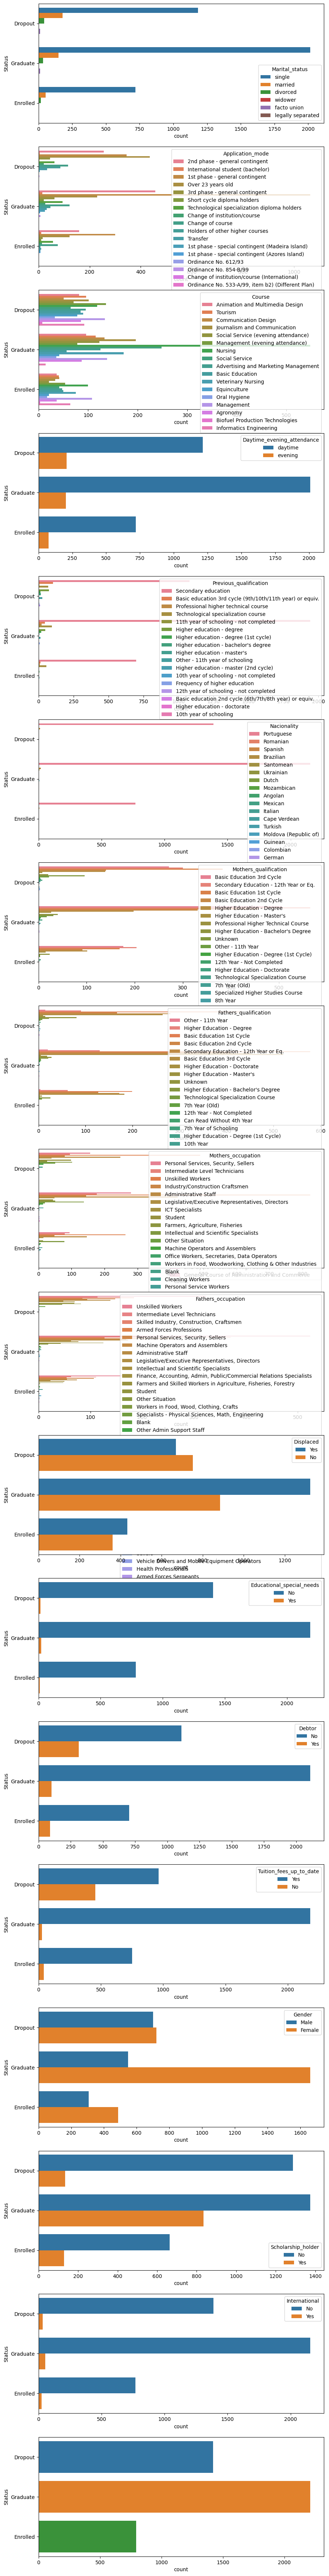

In [11]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,90))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()
 
categorical_plot(
    features=categorical_cols,
    df=df,
    segment_feature="Status"
)

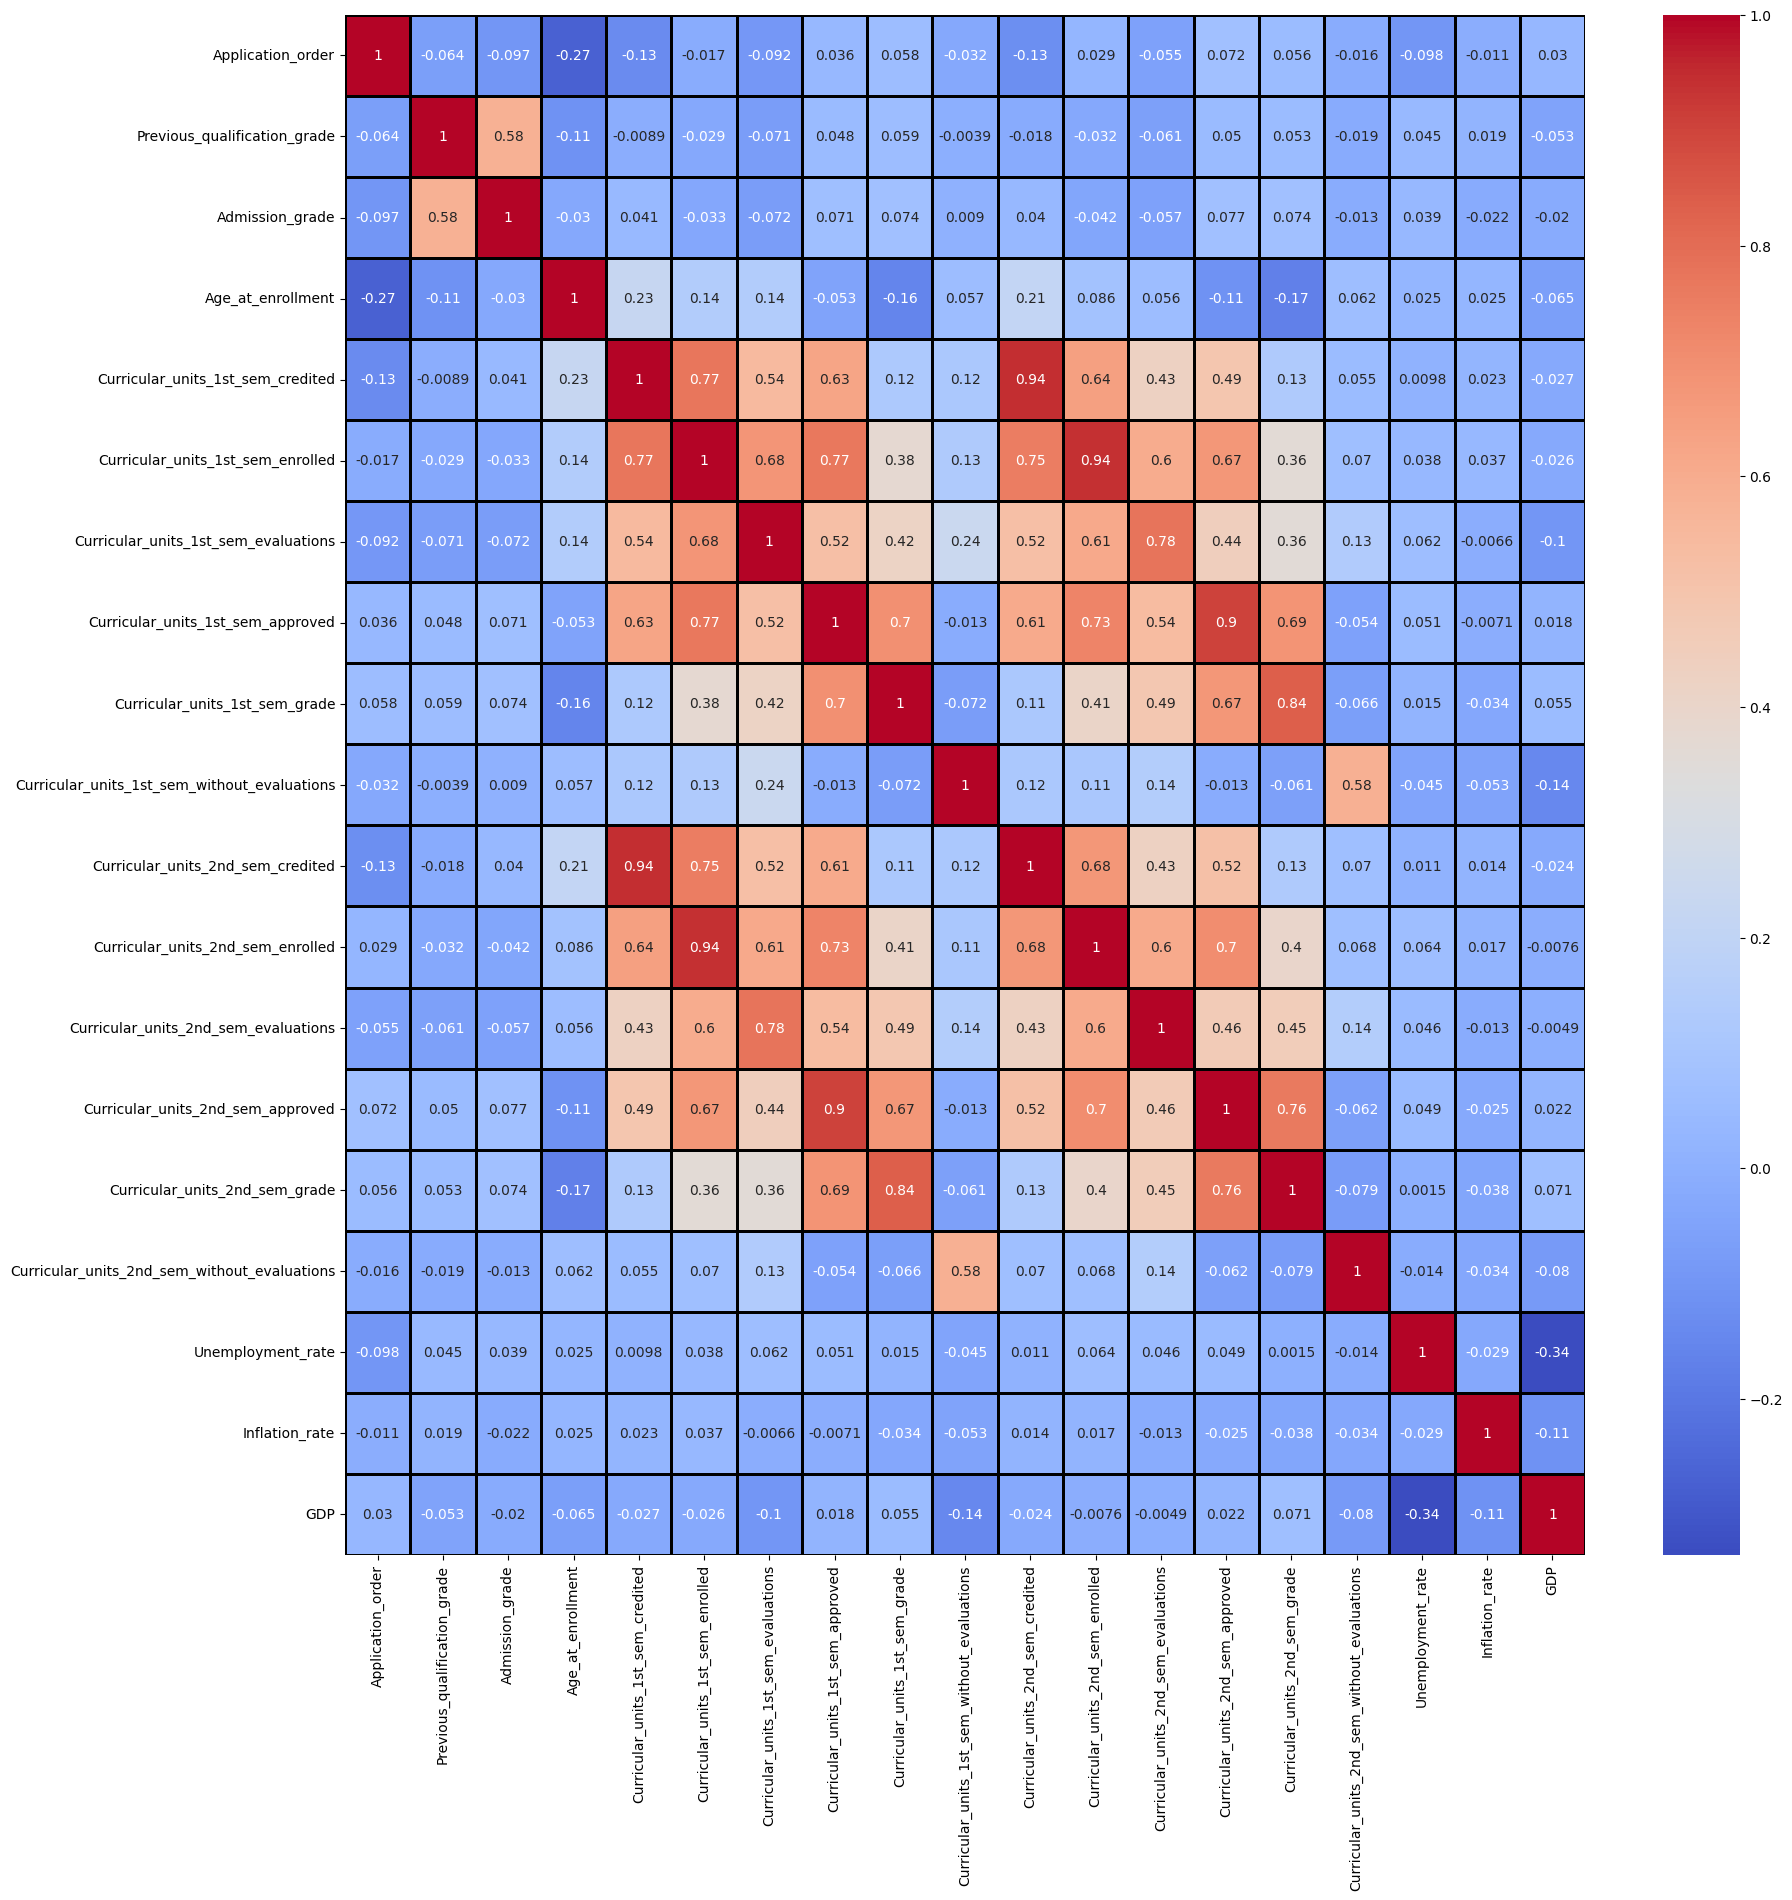

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linecolor='black', linewidth=1)
plt.show()

## Data Preparation / Preprocessing

In [13]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

(3981, 37)
(443, 37)


In [14]:
X_train = train_df.drop(columns="Status", axis=1)
y_train = train_df["Status"]
 
X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [15]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df
 
def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        combined = pd.concat([df, df_test], axis=0)
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(combined[feature])
            df[feature] = encoder.transform(df[feature])
            df_test[feature] = encoder.transform(df_test[feature])
            joblib.dump(encoder, f"model/encoder_{feature}.joblib")
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, f"model/encoder_{feature}.joblib")
        return df

In [16]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

new_train_df, new_test_df = scaling(numerical_cols, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_cols, new_train_df, new_test_df)

In [17]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")
 
new_y_test = encoder.transform(y_test)

In [18]:
pca_numerical_columns_1 = [
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
]

In [19]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

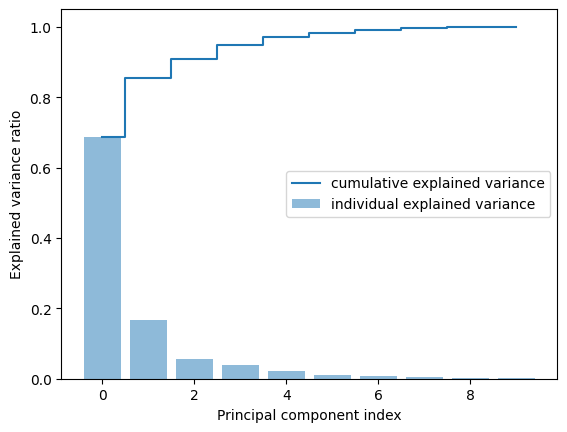

In [20]:
pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [21]:
pca_1 = PCA(n_components=3, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Age_at_enrollment,International,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3
0,4,0,0.111111,2,0,15,0.578947,14,16,20,...,0.037736,0,0.000000,0.0,0.151163,0.488889,1.000000,0.423925,0.458618,-0.086817
1,4,0,0.111111,11,0,15,0.357895,14,10,11,...,0.056604,0,0.000000,0.0,0.918605,0.800000,0.000000,0.312387,-0.037744,0.002455
2,4,0,0.444444,11,0,15,0.431579,14,10,10,...,0.075472,0,0.000000,0.0,0.000000,0.755556,0.578600,0.266207,-0.106171,-0.040219
3,4,5,0.111111,6,0,15,0.052632,1,16,25,...,0.037736,1,0.166667,0.0,0.209302,0.000000,0.124174,0.290828,-0.191267,-0.002987
4,4,3,0.444444,5,0,15,0.347368,14,24,28,...,0.037736,0,0.000000,0.0,0.406977,0.311111,0.803170,0.122879,-0.084475,-0.004282


In [22]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
test_pca_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Age_at_enrollment,International,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3
0,0,14,0.111111,6,0,15,0.401053,14,16,28,...,0.245283,0,0.0,0.0,0.406977,0.311111,0.803170,-0.399910,0.092150,-0.135189
1,4,3,0.111111,13,0,15,0.315789,14,21,20,...,0.018868,0,0.0,0.0,1.000000,0.244444,0.414795,0.115636,-0.058257,-0.039132
2,4,3,0.111111,3,0,15,0.400000,14,9,10,...,0.018868,0,0.0,0.0,1.000000,0.244444,0.414795,0.190195,-0.040601,-0.059723
3,4,3,0.222222,0,0,15,0.157895,14,24,28,...,0.037736,0,0.0,0.0,0.918605,0.800000,0.000000,0.206237,-0.110532,0.016564
4,4,14,0.111111,11,0,15,0.368421,14,8,11,...,0.188679,0,0.0,0.0,0.406977,0.311111,0.803170,-0.743430,0.295457,0.157015


## Modeling

In [23]:
param_grid = {
    "penalty": ["l1","l2"],
    "C": [0.01, 0.1, 1]
}
 
log_model = LogisticRegression(random_state=123)
 
CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, new_y_train)

c:\Users\willy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\willy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\willy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\willy\AppDat

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']})

In [24]:
print("best parameters: ", CV_lr.best_params_)

best parameters:  {'C': 0.1, 'penalty': 'l2'}


In [25]:
log_model = LogisticRegression(random_state=123, penalty=CV_lr.best_params_['penalty'], C=CV_lr.best_params_['C'])
log_model.fit(train_pca_df, new_y_train)
joblib.dump(log_model, "model/log_model.joblib")

c:\Users\willy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['model/log_model.joblib']

## Evaluation

In [26]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Dropout', 'Graduate', 'Enrolled']
    
    print(classification_report(y_pred=y_pred, y_true=y_true))
    
    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    
    return confusion_matrix_df

              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.77       147
    Enrolled       0.75      0.04      0.07        83
    Graduate       0.67      0.94      0.78       213

    accuracy                           0.71       443
   macro avg       0.74      0.58      0.54       443
weighted avg       0.73      0.71      0.65       443



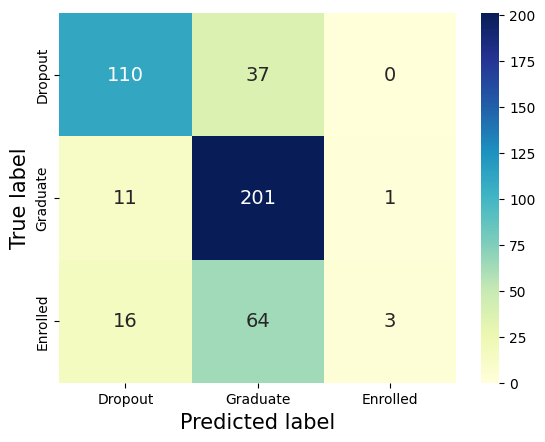

,Dropout,Graduate,Enrolled
Dropout,110,37,0
Graduate,11,201,1
Enrolled,16,64,3


In [27]:
y_pred_test = log_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)